In [1]:
# Step 1: Importing the basic libraries that we'll use throughout the project

# pandas is for handling the dataset (loading, exploring, cleaning, etc.)
import pandas as pd

# numpy helps with number operations like arrays or simple stats
import numpy as np

# matplotlib and seaborn are used to draw charts and graphs
import matplotlib.pyplot as plt
import seaborn as sns

# I chose these libraries because they are the most common and beginner-friendly for data analysis


✅ Why these and not others?

pandas is the best choice for DataFrames (tables) – better than plain Python lists/dictionaries.

numpy is used under the hood in pandas – it's useful when we need to deal with numbers directly.

matplotlib + seaborn are easier for creating both simple and beautiful plots. Libraries like plotly or bokeh are more interactive but not needed for basic EDA.

---

In [2]:
# Step 2: Loading the hotel bookings dataset

# I'm using read_csv() because the data file is in CSV format (comma-separated values)
# It loads the file into a pandas DataFrame which looks like an Excel sheet in Python
df = pd.read_csv('hotel_bookings.csv')

# Let's check the first 5 rows to see how the data looks
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


✅ Why read_csv() and not something else?

read_csv() is specifically built for reading .csv files and is super fast.

If the data was in Excel format, I would use pd.read_excel().

Showing the first few rows with head() gives a quick idea about column names, data types, and whether anything looks off.

---

In [3]:
# Step 3: Checking for any missing (null) values in the dataset

# isnull() creates a True/False table showing where data is missing
# sum() counts how many missing values are there in each column
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

✅ Why use isnull().sum() and not something else?

This is the simplest and fastest way to see how much data is missing column-wise.

I didn’t use info() here because info() only tells you whether nulls exist, not how many.

This helps me decide which columns may need to be cleaned, filled, or removed later.

---

In [4]:
# Step 4: Let's look at the overall structure of the dataset

# This will show:
# - Total number of rows and columns
# - Column names and their data types (int, float, object, etc.)
# - How many non-null values each column has
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

✅ Why use df.info() instead of other options?

df.info() gives a quick overview of both data types and missing values at once.

It’s more helpful than df.dtypes alone because it also shows non-null counts.

Helps me identify which columns are numeric, which are text, and which may need type conversion later.

---

In [5]:
# Step 5: Getting a quick summary of the numeric columns

# describe() gives basic stats like:
# - count: how many values
# - mean: average
# - std: standard deviation
# - min, 25%, 50%, 75%, max: help understand distribution
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


✅ Why describe() and not custom calculations?

describe() is a one-liner that covers all essential stats for numeric columns.

It's much faster than calculating each stat manually (like df.mean(), df.std()).

This helps me understand:

Which features have outliers (if max is very far from 75%)

What the average values are

If the data is skewed

---

In [6]:
# Step 6: Checking if the dataset has any duplicate rows

# duplicated() returns True for every row that's a duplicate of a previous one
# sum() counts how many such rows are there
df.duplicated().sum()


31994

✅ Why check for duplicates using duplicated().sum()?

It's the easiest way to spot if the same booking is entered more than once.

I didn’t remove them yet because:

Sometimes duplicates are okay (e.g., large group bookings)

I’ll only drop them if I confirm they’re true duplicates with no differences

---

In [7]:
# Step 7: Removing duplicate rows from the dataset

# Only doing this because we confirmed duplicates exist earlier
# inplace=True makes sure the changes are saved to the original DataFrame
df.drop_duplicates(inplace=True)


✅ Why use drop_duplicates() here?

Helps keep the data clean and accurate — especially for EDA and modeling later.

Prevents overcounting the same booking during analysis.

Using inplace=True avoids creating a new copy (saves memory).

---

In [8]:
# Step 8: Checking all column names in the dataset

# This helps me quickly see:
# - What features (columns) are available
# - If any names need renaming for better understanding
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

✅ Why use df.columns and not df.head() again?

df.head() shows just a few columns + data.

df.columns is better when I want to focus only on column names.

Helps me plan which columns to use for analysis or drop if not useful.

---

In [9]:
# Step 9: Removing rows where the 'children' column has missing (null) values

# I'm using ~ (tilde) to keep only the rows where 'children' is NOT null
# This is a simple way to clean missing values in a specific column
df = df[~df['children'].isnull()]


✅ Why drop these rows instead of filling them?

I chose to drop them because:

There are probably very few missing entries in the 'children' column

We don’t know if it's 0 or missing on purpose, so guessing could be risky

If there were many missing values, I would consider filling them with a default (like 0 or median), but only after understanding the pattern

---

In [10]:
# Step 11: Handling missing values in the 'country' column

# Here I'm filling missing country names with the most common one (mode)
# mode()[0] gets the first most frequent value
df['country'].fillna(df['country'].mode()[0], inplace=True)


/var/folders/b1/zg8gvzyd2bs4s02k1b6464rc0000gn/T/ipykernel_39496/684487292.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)


✅ Why use mode and not something else?

Using the most frequent country is a safe option when we don’t know the actual value.

I didn’t use 'Unknown' or 'Other' because mode helps keep the data consistent.

This also avoids errors in visualizations or grouping by country later.

---

In [11]:
# Step 12: Filling missing values in the 'agent' column

# Missing values in 'agent' probably mean that the booking was done without an agent
# So I'm replacing NaNs with 0 (which will represent 'no agent')
df['agent'].fillna(0, inplace=True)


/var/folders/b1/zg8gvzyd2bs4s02k1b6464rc0000gn/T/ipykernel_39496/2218350603.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(0, inplace=True)


✅ Why use 0 instead of mode or mean?

agent is usually a code (like 1, 2, 3...) identifying who booked the reservation.

A missing value most likely means direct booking (no agent), so 0 is a clean and logical choice.

Mode could falsely assign an agent that wasn’t involved.

---

In [12]:
# Step 13 (updated): Dropping the 'company' column due to too many missing values

# Since over 94% values in 'company' are missing, it's better to drop it
df.drop('company', axis=1, inplace=True)


📌 Why axis=1?

Because we are dropping a column (not a row).

📌 Why inplace=True?

So that the change applies directly to df without needing a new variable.

✅ Why drop the 'company' column?
🔸 Too much missing data (94%+): filling it won't add meaningful info.

🔸 It's likely not a major factor in guest behavior (most bookings are personal, not corporate).

🔸 Keeping it might just add noise or confusion during analysis or modeling.

---

In [13]:
# Step 14: Converting 'reservation_status_date' to proper datetime format

# Right now, it's probably a string (object type)
# Converting it to datetime helps us do time-based analysis later (like month/year trends)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


✅ Why convert to datetime?

Makes it easy to extract year, month, day, weekday, etc.

Helps in time series analysis or seasonal booking trends.

Using pd.to_datetime() is the most reliable method — it auto-detects date formats and handles conversion.

---

In [14]:
# Step 16: Removing rows where 'adr' (Average Daily Rate) is negative

# 'adr' means how much revenue the hotel earned per night for a booking
# Negative revenue doesn't make sense, so we’ll filter those rows out
df = df[df['adr'] >= 0]


In [15]:
# Check how many rows were removed due to negative adr
(df['adr'] < 0).sum()


0

✅ Why remove negative ADR values?

ADR (Average Daily Rate) must be 0 or positive — it represents income.

Negative ADRs are usually errors in data entry or cancellations wrongly recorded.

Keeping them would affect analysis like revenue trends, averages, or profit estimation.

---

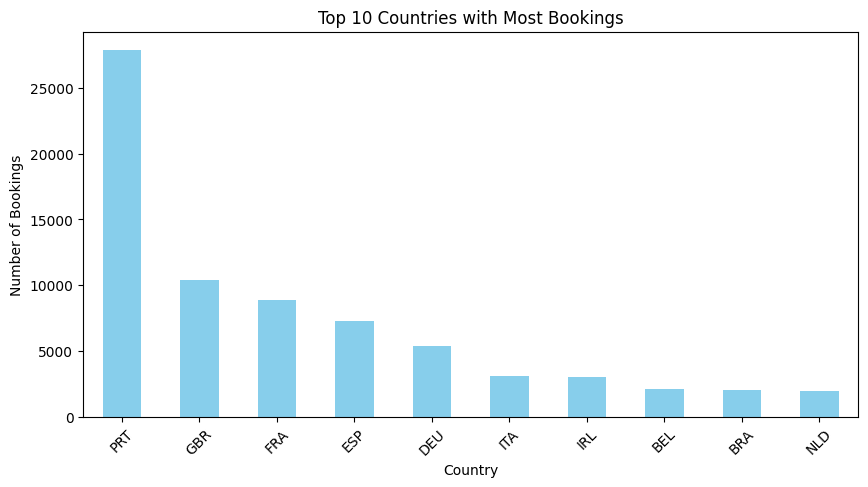

In [16]:
# Step 17: Plotting Top 10 Countries with Most Bookings

# Getting the top 10 countries by number of bookings
top_countries = df['country'].value_counts().head(10)

# Plotting a bar chart to visualize it
top_countries.plot(kind='bar', figsize=(10, 5), color='skyblue')

plt.title('Top 10 Countries with Most Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


✅ Why this method?

value_counts() is perfect for counting occurrences of countries.

.head(10) helps us focus on the top 10, not the full list.

A bar chart is ideal for showing comparisons between categories like countries.

📌 Why not use pie chart or line plot?

Pie charts are harder to read when you have many categories.

Line plots are for continuous or time-based data — not suitable here.

---

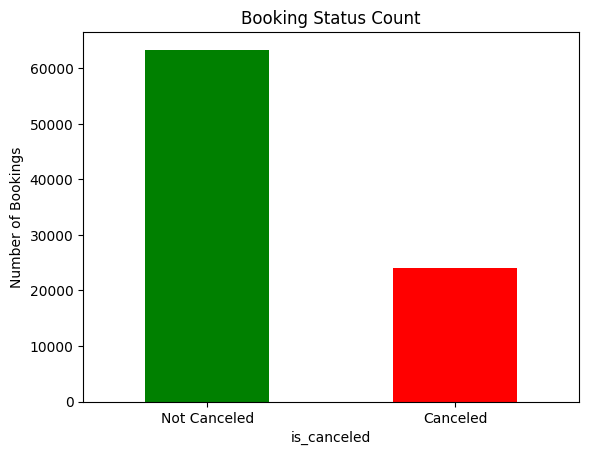

In [17]:
# Step 18: Visualizing booking status (Canceled vs Not Canceled)

# Count how many bookings were canceled (1) and not canceled (0)
status_count = df['is_canceled'].value_counts()

# Plot a bar chart to visualize cancellation pattern
status_count.plot(kind='bar', color=['green', 'red'])

plt.title('Booking Status Count')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'], rotation=0)
plt.ylabel('Number of Bookings')
plt.show()


✅ Why this method?

value_counts() is a simple and fast way to get frequency of each class.

Bar plots make comparison between canceled and non-canceled very easy to read.

Custom labels (['Not Canceled', 'Canceled']) make the chart clear for presentation or viva.

📌 What does this chart tell us?

Helps understand cancellation rate.

If cancellations are high, hotel may need better payment policies or customer engagement.

🔍 Why use a Bar Chart for Cancellation Status?
You’re showing counts of two categories:

Not Canceled (0)

Canceled (1)

So a bar chart is ideal because:

Chart Type	Suitability	Reason
| Chart Type      | Suitability    | Reason                                                                    |
| --------------- | -------------- | ------------------------------------------------------------------------- |
| ✅ **Bar Chart** | ✅ Best         | Shows comparison of discrete categories clearly. Easy to label and color. |
| ❌ **Pie Chart** | ❌ Not Ideal    | Hard to interpret exact values. Less readable for only 2 classes.         |
| ❌ **Line Plot** | ❌ Wrong use    | Meant for trends over time, not category counts.                          |
| ❌ **Histogram** | ❌ Not suitable | Used for continuous numerical data — not binary like cancellation.        |
| ❌ **Boxplot**   | ❌ Irrelevant   | Good for distribution, not count comparison.                              |


💡 Bar Chart Benefits in This Case:
Visually simple: Green vs Red gives an immediate feel of what’s happening.

Custom labeling: We easily renamed 0 and 1 to 'Not Canceled' and 'Canceled'.

Presentation-ready: Looks clean and easy to explain.

---

/var/folders/b1/zg8gvzyd2bs4s02k1b6464rc0000gn/T/ipykernel_39496/3065833756.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adr_month = df.groupby('arrival_date_month')['adr'].mean().loc[month_order]


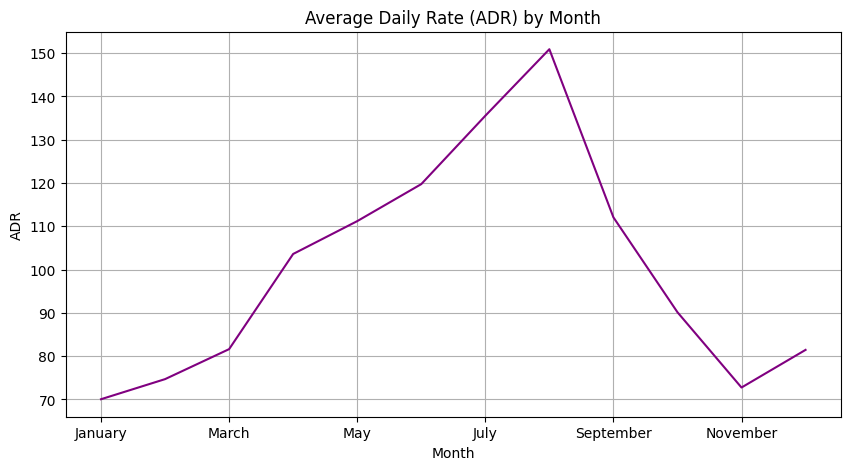

In [19]:
# Step 19: Analyzing ADR (Average Daily Rate) by month

# Ensure months are in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# Grouping by month and calculating the mean ADR for each month
adr_month = df.groupby('arrival_date_month')['adr'].mean().loc[month_order]

# Plotting a line chart to visualize how ADR changes each month
adr_month.plot(kind='line', figsize=(10, 5), color='purple')

plt.title('Average Daily Rate (ADR) by Month')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.grid(True)
plt.show()


✅ Why use a Line Chart here?

Time-based trend: We are looking at how ADR changes month by month — so a line chart is perfect.

Continuous data: ADR is a continuous numerical value that makes it easier to visualize trends with a line.

Clear patterns: A line chart will show if prices go up in certain months, like holidays, or if there are any dips (e.g., off-season).

ADR by Month (Line Chart): <br>

Insight: Some months have significantly higher ADR (Average Daily Rate), which may indicate peak tourist season or festive times.

Use Case: Hotel can increase prices in high-demand months and offer discounts in low-demand months.

---

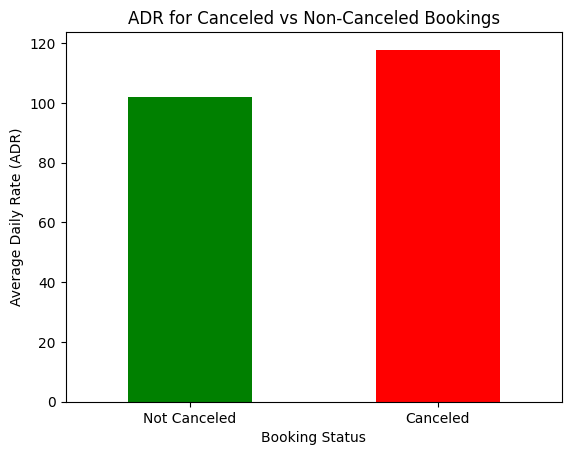

In [20]:
# Step 20: Comparing ADR for Canceled vs Non-Canceled Bookings

# Group by cancellation status and find the average ADR
df.groupby('is_canceled')['adr'].mean().plot(kind='bar', color=['green', 'red'])

plt.title('ADR for Canceled vs Non-Canceled Bookings')
plt.xlabel('Booking Status')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'], rotation=0)
plt.show()


✅ Why this method?

GroupBy + mean helps us compare ADR across categories (canceled vs not).

Bar chart works great here since we’re comparing 2 categories.

Tells us if canceled bookings tend to have higher or lower ADR — useful for revenue forecasting and risk management.

📌 Why not line or scatter?

Line: Not for categorical comparison.

Scatter: Good for two continuous variables, not this.

Bar wins for simple category-to-value comparisons.

ADR vs Cancellation (Bar Chart)

Insight: If canceled bookings have higher ADR, hotel might be losing out on more profitable customers.

Use Case: Improve cancellation policies or offer incentives to retain these bookings.

---

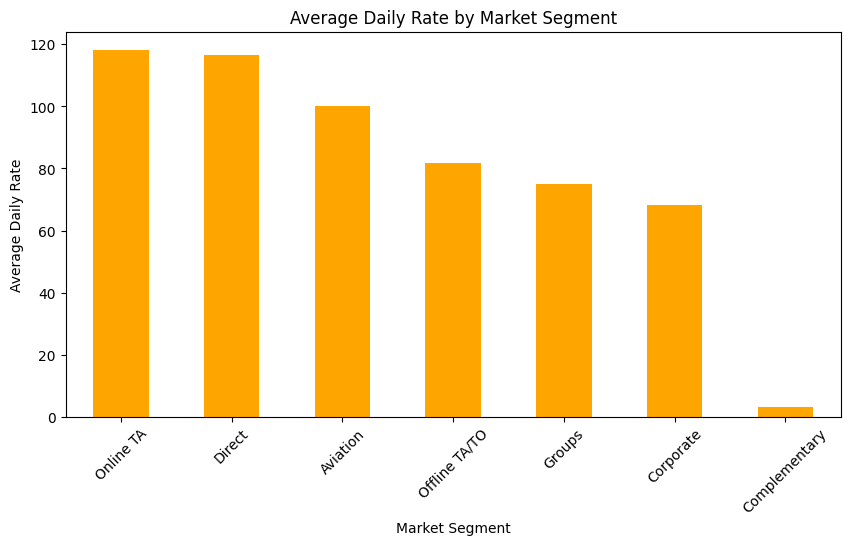

In [21]:
# Step 21: Analyzing ADR by Market Segment

# Grouping by market segment and calculating average ADR for each type
segment_adr = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)

# Plotting the results as a bar chart to compare different segments
segment_adr.plot(kind='bar', figsize=(10, 5), color='orange')

plt.title('Average Daily Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


✅ Why this method?

Grouping by market_segment gives insight into how each customer group (like corporate, online travel agent, direct) contributes to revenue.

Using mean() shows how much they typically pay.

A bar chart is ideal to compare categories side-by-side.

| Chart  | Suitability | Reason                                             |
| ------ | ----------- | -------------------------------------------------- |
| ✅ Bar  | ✅ Best      | Clear comparison of average ADR between categories |
| ❌ Pie  | ❌ Not Ideal | Doesn’t show actual ADR values, only proportions   |
| ❌ Line | ❌ Wrong     | Not suitable for unrelated categories              |


ADR by Market Segment (Bar Chart)

Insight: Certain segments like online travel agents (OTA) or corporate clients may bring more revenue.

Use Case: Focus marketing on the most profitable segments.

---

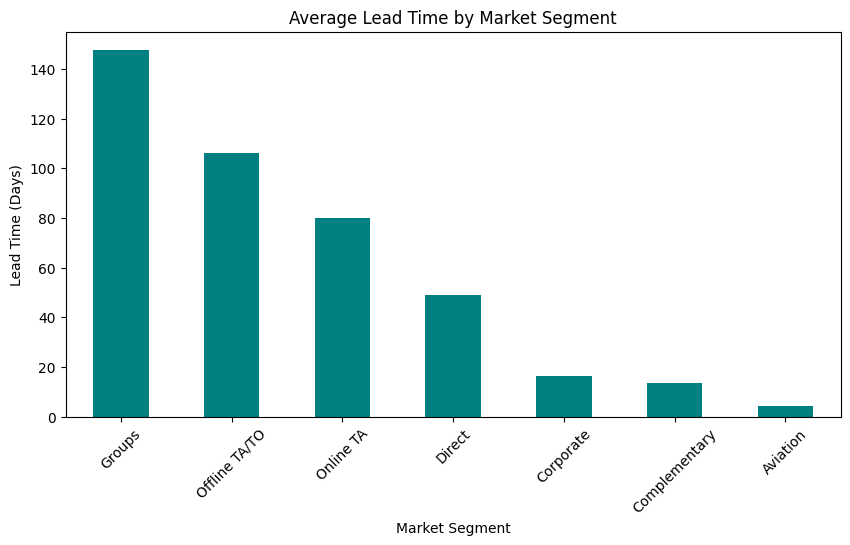

In [22]:
# Step 22: Analyzing Lead Time by Market Segment

# Calculate average lead time (days in advance booking is made) for each market segment
lead_time_segment = df.groupby('market_segment')['lead_time'].mean().sort_values(ascending=False)

# Plot the lead time as a bar chart
lead_time_segment.plot(kind='bar', figsize=(10, 5), color='teal')

plt.title('Average Lead Time by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


✅ Why analyze lead time?

Lead time = How early people book before arrival.

Tells you which customer types book last-minute vs well in advance.

Helps with:

Inventory planning

Early-bird discounts

Forecasting demand



✅ Why this method?

Group by market_segment → average lead_time → clear comparison.

Bar chart shows who books earliest vs latest.

| Chart        | Why not?                                      |
| ------------ | --------------------------------------------- |
| ❌ Line chart | Not time-series data                          |
| ❌ Pie chart  | Can’t show actual lead time values            |
| ✅ Bar chart  | Best for comparing averages across categories |


Lead Time by Market Segment (Bar Chart)

Insight: Some segments book well in advance (like groups), while others book last-minute.

Use Case: Use early-bird offers or last-minute deals depending on segment behavior.

---

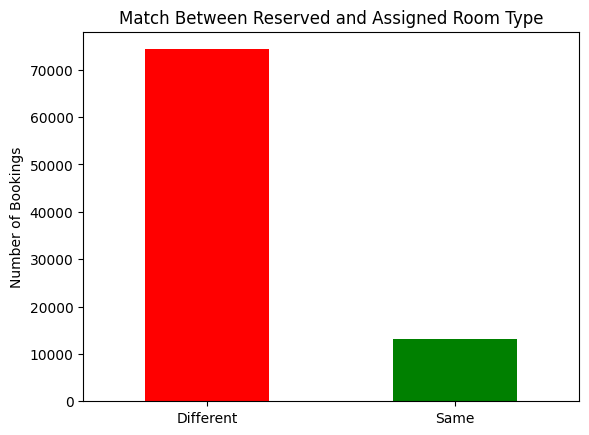

In [23]:
# Step 23: Checking if assigned room matches reserved room

# Compare if reserved and assigned room types are the same
# True = same room assigned, False = room was changed (maybe upgrade or overbooking)
(df['reserved_room_type'] == df['assigned_room_type']).value_counts().plot(
    kind='bar', 
    color=['red', 'green']
)

plt.title('Match Between Reserved and Assigned Room Type')
plt.xticks(ticks=[0, 1], labels=['Different', 'Same'], rotation=0)
plt.ylabel('Number of Bookings')
plt.show()


✅ Why this analysis?

Reveals whether the hotel is consistently fulfilling booking promises.

Room changes may mean:

Free upgrades (good!)

Overbooked or inventory issues (bad!)

✅ Why this method?

Simple comparison: df['reserved_room_type'] == df['assigned_room_type']

.value_counts() counts how many True and False cases.

Bar chart clearly shows how often reassignment happens.



| Chart        | Suitability                                   |
| ------------ | --------------------------------------------- |
| ✅ Bar chart  | Best to compare 2 categories                  |
| ❌ Pie chart  | Harder to read counts and justify in analysis |
| ❌ Line chart | Makes no sense for categorical comparison     |


 Room Assignment vs Reservation (Bar Chart)
 
Insight: If many guests don’t get the room they booked, it may indicate overbooking or upgrades.

Use Case: Track if this is happening too often — may hurt customer satisfaction.

---

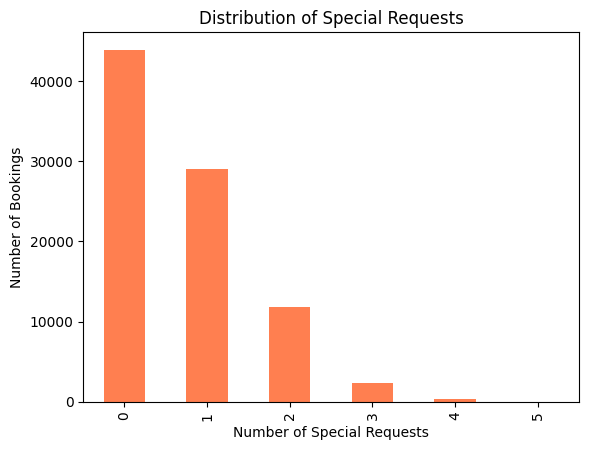

In [24]:
# Step 24: Visualizing how many special requests guests usually make

# Count how many bookings had 0, 1, 2... special requests
df['total_of_special_requests'].value_counts().sort_index().plot(
    kind='bar', 
    color='coral'
)

plt.title('Distribution of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Bookings')
plt.show()


✅ Why this method?

value_counts() → tells how many bookings had 0, 1, 2, etc. special requests.

sort_index() → ensures the bars appear in increasing order (0 to max).

Bar chart helps compare which number of requests is most common.

Special Requests Distribution (Bar Chart)

Insight: Most guests make 0 or 1 special request, but some ask for 3+.

Use Case: Helps in resource planning — staff can be trained to handle these common requests.

---

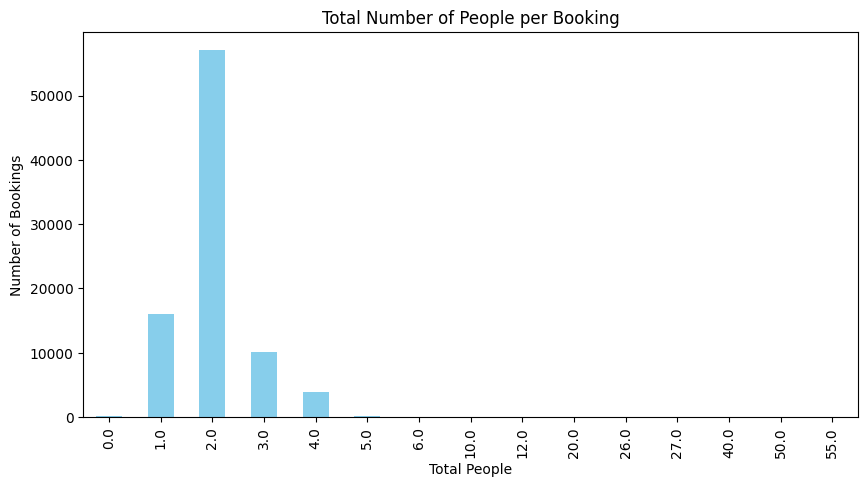

In [25]:
# Step 25: Analyzing group size per booking

# Calculate total number of people in each booking (adults + children + babies)
df['total_people'] = df['adults'] + df['children'] + df['babies']

# Count how many bookings had 1, 2, 3... people and plot the distribution
df['total_people'].value_counts().sort_index().plot(
    kind='bar', 
    figsize=(10, 5), 
    color='skyblue'
)

plt.title('Total Number of People per Booking')
plt.xlabel('Total People')
plt.ylabel('Number of Bookings')
plt.show()


✅ Why this method?

It shows the most common group sizes at the hotel.

Helps hotels plan room inventory (e.g., more double rooms if 2 people is common).

Useful for marketing to target specific group types.

Group Size (Total People per Booking) (Bar Chart)

Insight: If most bookings are for 1–2 people, hotel should focus on solo and couple travelers.

Use Case: Optimize room allocation (e.g., more double rooms than large family suites).

---

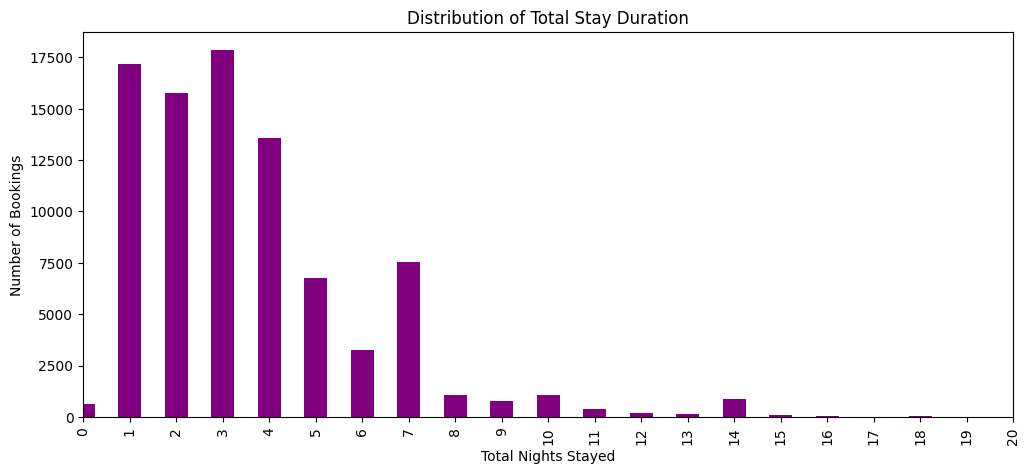

In [26]:
# Step 26: Understanding how long guests usually stay

# Combine weekend and weekday stays to get total number of nights stayed
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Plot the count of bookings for each total stay value (1 night, 2 nights, etc.)
df['total_stay'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(12, 5),
    color='purple'
)

plt.title('Distribution of Total Stay Duration')
plt.xlabel('Total Nights Stayed')
plt.ylabel('Number of Bookings')
plt.xlim(0, 20)  # Limit to 20 nights for clarity
plt.show()


✅ Why we used this method:
The hotel dataset has separate columns for weekend nights and week nights. Combining them gives total stay duration.

value_counts() shows how many bookings occurred for each duration.

A bar chart works best here because we are dealing with discrete count data (1 night, 2 nights, 3 nights…).

xlim(0, 20) keeps the chart focused on the most frequent stay durations (since long stays are rare and can skew the chart).

📊 What We Learn from This Graph (Interpretation):

Most bookings are for short stays, especially 1 to 3 nights.

Very few guests stay more than a week.

This shows that the hotel mostly serves short-term travelers like business professionals or weekend tourists.

---

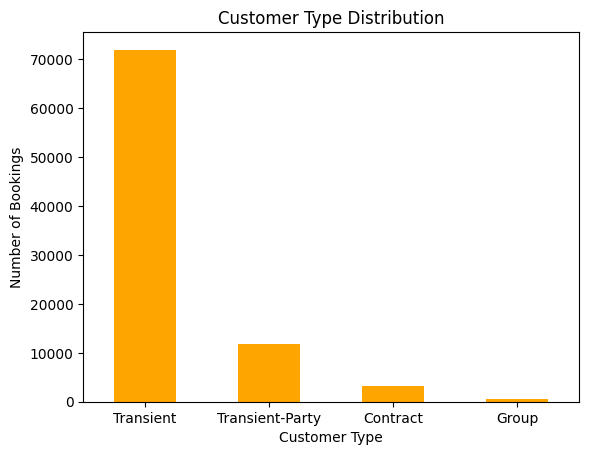

In [27]:
# Step 27: Checking which customer types book the most

# Count how many bookings come from each customer type
df['customer_type'].value_counts().plot(
    kind='bar', 
    color='orange'
)

plt.title('Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)  # Keep labels horizontal for clarity
plt.show()


✅ Why we used this method:

value_counts() is ideal to count frequency of categories like customer types.

A bar chart makes it easy to compare these counts visually.

Simple and clean — perfect for initial analysis.

📊 What We Learn from This Graph (Interpretation):

You can clearly see which customer type is the most common — e.g., Transient, Contract, Group, or Transient-Party.

Usually, 'Transient' guests are highest — these are individual guests not tied to a group or contract.

---

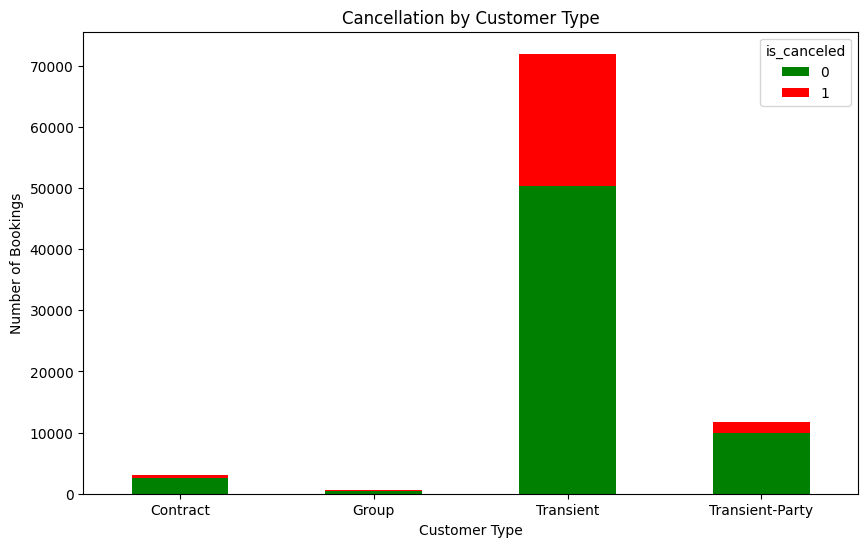

In [28]:
# Step 28: Analyzing cancellations by customer type

# Group by customer type and count cancellations vs non-cancellations
df.groupby('customer_type')['is_canceled'].value_counts().unstack().plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=['green', 'red']
)

plt.title('Cancellation by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()


✅ Why we used this method:

groupby() and value_counts() allow us to see how cancellations differ across customer types.

Stacked bar chart makes it clear to compare the proportion of cancellations vs non-cancellations for each customer type.

unstack() reshapes the data to get each cancellation category in a separate column.

📊 What We Learn from This Graph (Interpretation):

You can see the percentage of cancellations vs non-cancellations for each customer type.

If Group or Contract types have high cancellation rates, this could indicate booking risk or issues with certain customer segments.

Transient customers may have more flexibility in their bookings, causing higher cancellation rates.

💡 Business Use/Insight:

Transient guests: Higher cancellations might suggest offering non-refundable rates or incentives to reduce cancellation.

Group bookings: Consider offering a cancellation policy to ensure commitment.

Contract customers: If cancellations are low, consider long-term contracts with discounts.

---

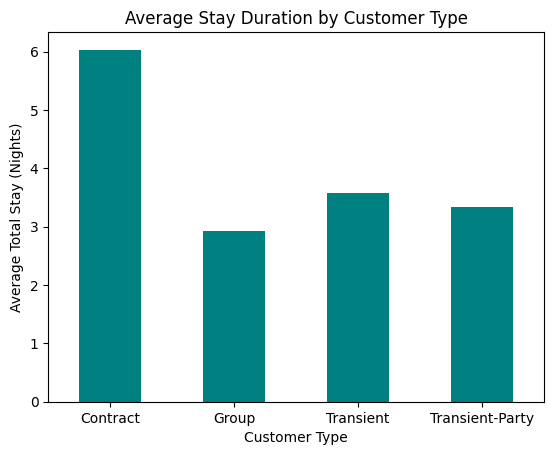

In [29]:
# Step 29: Checking how long each customer type stays on average

# Group the data by customer type and calculate average total stay duration
df.groupby('customer_type')['total_stay'].mean().plot(
    kind='bar',
    color='teal'
)

plt.title('Average Stay Duration by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Total Stay (Nights)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()


✅ Why we used this method:

groupby() and mean() are used to compare average stay duration across customer types.

A bar chart makes it easy to compare values between different categories.

Focuses on average behavior, not total number of bookings.

📊 What We Learn from This Graph (Interpretation):

Some customer types (like Contract) may stay longer due to business agreements.

Transient guests might have shorter stays, indicating weekend trips or short vacations.

Group customers may show variable duration depending on the event type (weddings, tours, etc.).

---

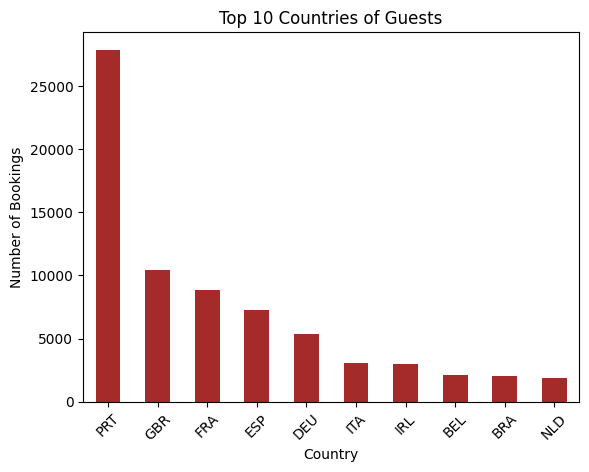

In [30]:
# Step 30: Find out which countries guests are coming from the most

# Get top 10 countries based on number of bookings
top_10_countries = df['country'].value_counts().head(10)

# Plot a bar chart of these countries
top_10_countries.plot(
    kind='bar',
    color='brown'
)

plt.title('Top 10 Countries of Guests')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()


✅ Why we used this method:

value_counts() gives us the number of bookings per country.

.head(10) focuses only on the top 10 for better readability.

A bar chart is ideal for comparing frequency across categories (countries).

📊 What We Learn from This Graph (Interpretation):

You can identify the most common nationalities of guests.

Usually, PRT (Portugal) is highest in this dataset, since the hotel is located there.

Other countries (like GBR, FRA, DEU, ESP, etc.) reflect international customers.

💡 Business Use/Insight:

Helps the hotel to target promotions or discounts based on geography.

Hotel can consider adding multi-language support (like French, Spanish, German).

If there’s a rise in guests from a new country, hotel can collaborate with travel agencies in that country.

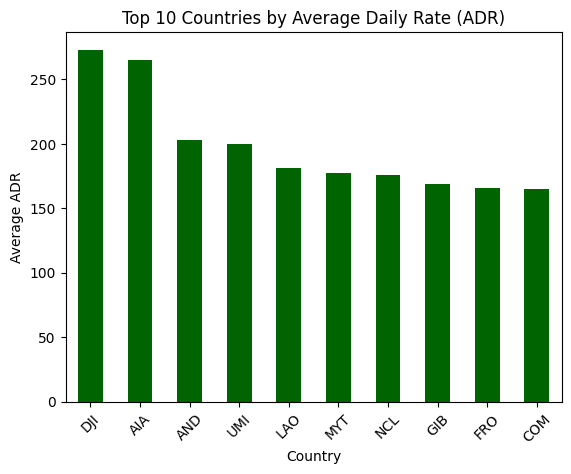

In [31]:
# Step 31: Which countries pay the most per day?

# Group by country and calculate the average ADR
top_10_adr_countries = df.groupby('country')['adr'].mean().sort_values(ascending=False).head(10)

# Plot a bar chart of top 10 countries with highest average ADR
top_10_adr_countries.plot(
    kind='bar',
    color='darkgreen'
)

plt.title('Top 10 Countries by Average Daily Rate (ADR)')
plt.xlabel('Country')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)
plt.show()


✅ Why we used this method:

groupby('country')['adr'].mean() calculates the average daily rate per country.

sort_values(ascending=False) gives us highest paying countries first.

Bar chart makes it easy to compare ADR across countries.

📊 What We Learn from This Graph (Interpretation):

It tells us which countries’ guests are paying more per night on average.

Some countries might have fewer guests, but higher ADR — this means premium-paying customers.

For example, if guests from USA, CHE (Switzerland), or BEL have higher ADR, they might be booking better rooms or booking last-minute (when prices surge).

💡 Business Use/Insight:

Target high-ADR countries with premium offers, loyalty programs, or custom packages.

Invest in ads or collaborations in countries where guests spend more.

Understand pricing strategies that are more accepted in certain countries (e.g., flexible pricing vs. fixed).

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


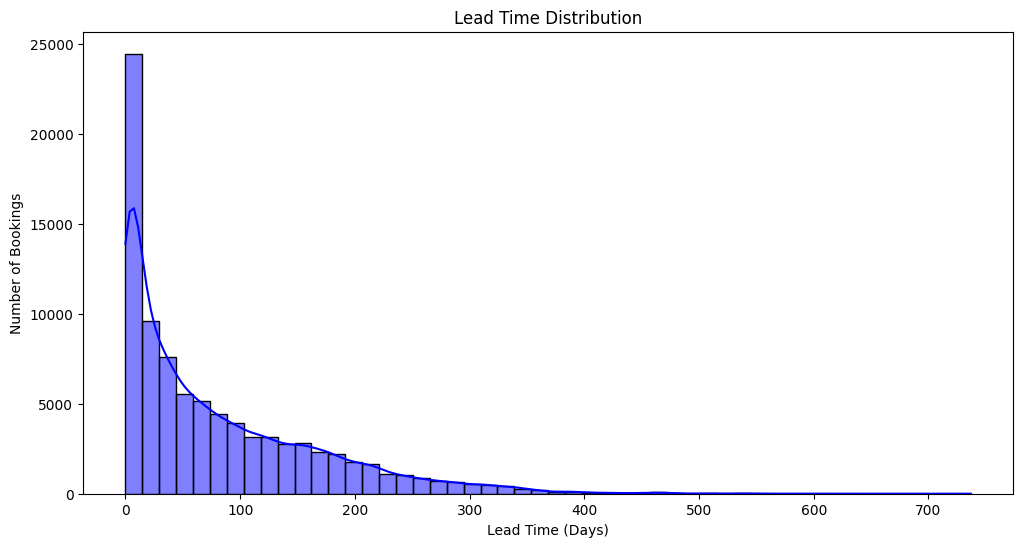

In [32]:
# Step 32: Understanding how far in advance guests book

# Plot a histogram to show the distribution of lead times
plt.figure(figsize=(12, 6))
sns.histplot(df['lead_time'], bins=50, kde=True, color='blue')

plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Bookings')
plt.show()


✅ Why we used this method:

lead_time is a numeric continuous variable, so a histogram is the right choice to see how it is distributed.

We added kde=True to see the smooth distribution curve.

50 bins give a detailed look without making it too noisy.

📊 What We Learn from This Graph (Interpretation):

The plot shows how many days in advance most guests book.

If there’s a peak at low lead times, many guests are booking last minute.

If there's a spread toward higher days, the hotel sees early planners — good for long-term forecasting.

💡 Business Use/Insight:

If most bookings happen close to the check-in date, the hotel can:

Offer last-minute deals.

Be cautious with room blocking too far in advance.

If bookings usually happen 60–120 days early:

Consider early bird discounts or loyalty rewards for planners.

Helps in adjusting dynamic pricing models.

---

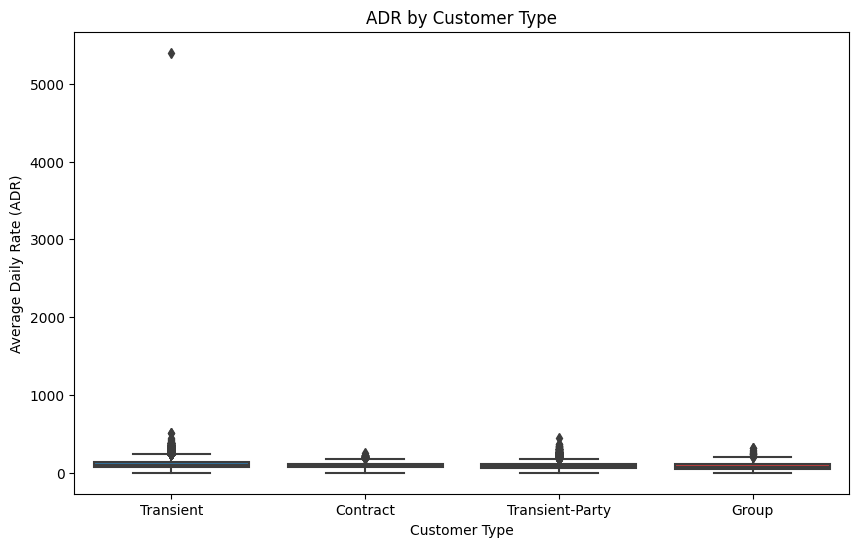

In [35]:
# Step 34: How much does each customer type pay per night?

# Use boxplot to compare ADR between different customer types
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='customer_type',
    y='adr',
    data=df
)

plt.title('ADR by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()
